In [1]:
# Cargar los datos que tenemos

import numpy as np

X_val = np.load('datos/X_val.npy')
Y_val = np.load('datos/Y_val.npy')

In [2]:
emotions = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [4]:
# Cagar el modelo

from tensorflow.keras.models import load_model

model = load_model('datos/modelo2_90ep.keras')

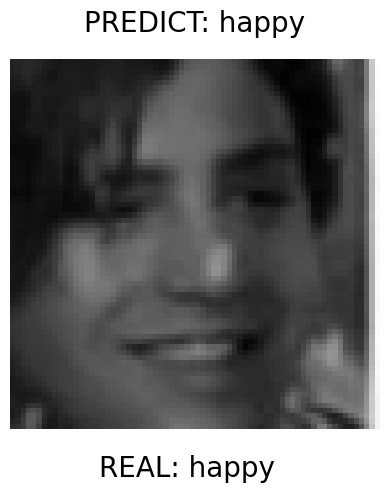

In [7]:
# Predicciones con los datos de validación

import random
import matplotlib.pyplot as plt


ind = random.randint(0,len(Y_val)-1)
real = np.argmax(Y_val[ind])
real = emotions[real]

img = np.expand_dims(X_val[ind], axis=0)
pred = np.argmax(model.predict(img,verbose = 0))
predict = emotions[pred]


original = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])

fig, ax = plt.subplots()
ax.imshow(original[ind], cmap='gray')
ax.axis('off')
ax.set_title(f'PREDICT: {predict}', fontsize=20, pad = 20)
fig.text(0.5, 0.01, f"REAL: {real}", ha='center', fontsize=20)

plt.show()



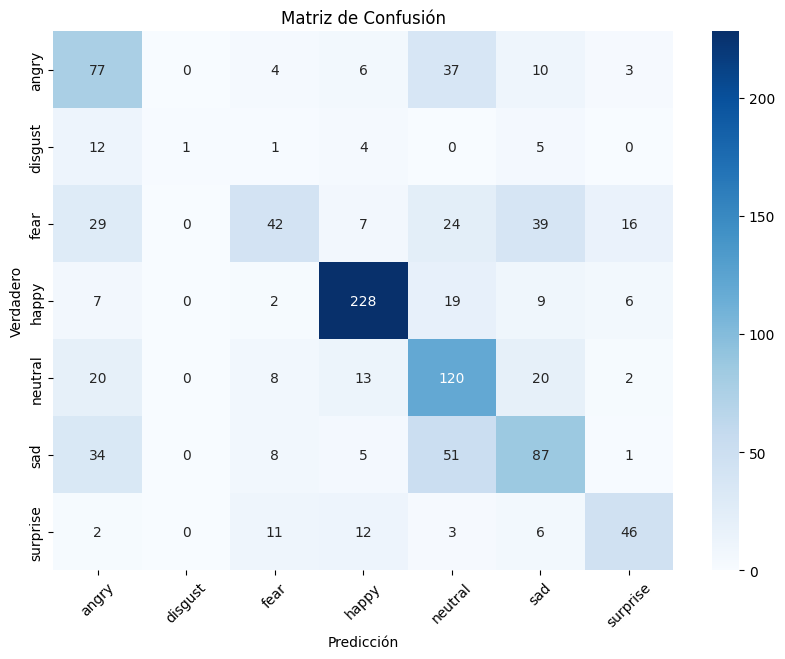

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_val,verbose = 0)

if len(Y_val.shape) > 1:
    Y_val = np.argmax(Y_val, axis=1)

if len(Y_pred.shape) > 1:
    Y_pred = np.argmax(Y_pred, axis=1)

conf_matrix = confusion_matrix(Y_val, Y_pred)

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

plt.figure(figsize=(10, 7))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')

plt.xticks(rotation=45)

plt.show()


In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 68, 68, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 34, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,666,199 (6.36 MB)

 Trainable params: 555,015 (2.12 MB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 1,110,032 (4.23 MB)